This notebook evaluates a set of raw and engineered features from the dataset.

In [1]:
import requests
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


Bad key "changing the colors used" on line 1 in
/Users/marceloqueiroz/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/marcelo_style_test.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Downloading the data (uncomment properly to re-download or load from file)
ACCESS_TOKEN = ##ENVIRONMENT VARIABLE HERE##
headers = {'Authorization': 'Bearer ' + ACCESS_TOKEN }
URL = "https://api.mementolabs.io/data/dataset"
# data = requests.get(URL, headers=headers).json()


# with open('data.txt', 'r') as outfile:
#     json.dump(data, outfile)
    
with open('data.txt', 'r') as outfile:
    data = json.load(outfile)

In [3]:
data.keys()

dict_keys(['allUsersData', 'numDays', 'missingUsers', 'missingUsersLength', 'success'])

In [4]:
data['numDays']  # number of total days from all users (consider # of observations)

5154

In [5]:
print(data['missingUsersLength'])  # number of users missing permission to share data for research
print('Number of missing users:', sum(1 for x in data['allUsersData'] if x == None))

60
Number of missing users: 60


In [6]:
data['success']  # probably returns True if the get request was successful

True

All users data contain the full JSON file of the OURA rings in a list.
Each element is one user. users containing None are due to missing permisssions

In [7]:
print('number of useful users:', len(data['allUsersData']) - data['missingUsersLength'])

number of useful users: 35


Each user contain sleep, readiness, activity and userInfo, according to documentation in https://cloud.ouraring.com/docs/

In [8]:
data_users = [x for x in data['allUsersData'] if x is not None]
print(data_users[0].keys())

dict_keys(['sleep', 'readiness', 'activity', 'userInfo'])


Now each line contains a user and each user contain several days on measurements.
total num of days is 5154, but what is the distribution of those days?

In [9]:
for i in data_users: # Double check if the days are even for each type:
    print(len(i['sleep']), len(i['readiness']), len(i['activity'])) 

173 175 180
196 200 201
192 206 200
157 157 159
195 207 200
193 199 201
195 199 200
166 170 171
180 191 196
187 190 191
200 200 201
181 185 127
18 20 20
192 206 200
192 214 200
58 61 66
172 174 176
111 111 112
77 77 78
199 199 201
199 199 198
117 118 118
115 118 126
194 194 200
116 120 122
153 161 179
1 1 3
13 14 15
199 199 200
152 167 192
85 85 88
177 181 187
176 180 188
83 95 109
140 140 152


Let's transform the data to dataframes in pandas to make our life easier.

In [10]:
df_sleep = pd.DataFrame(columns = list(data_users[0]['sleep'][0].keys()) +
                        list(data_users[0]['userInfo']['userInfo'].keys())).drop(['email'], axis=1)
df_activity = pd.DataFrame(columns=data_users[0]['activity'][0].keys())
df_readiness = pd.DataFrame(columns=data_users[0]['readiness'][0].keys())


for user in data_users:
    df_user = pd.DataFrame(user['sleep'])
    avail_user_info = user['userInfo']['userInfo'].keys()

    if 'age' in avail_user_info:
        df_user['age'] = user['userInfo']['userInfo']['age']
    else:
        df_user['age'] = np.nan

    if 'gender' in avail_user_info:
        df_user['gender'] = user['userInfo']['userInfo']['gender']
    else:
        df_user['gender'] = np.nan

    if 'weight' in avail_user_info:        
        df_user['weight'] = user['userInfo']['userInfo']['weight']
    else:
        df_user['weight'] = np.nan

    if 'height' in avail_user_info:
        df_user['height'] = user['userInfo']['userInfo']['height']
    else:
        df_user['height'] = np.nan

    if 'user_id' in avail_user_info:        
        df_user['user_id'] = user['userInfo']['userInfo']['user_id']
    else:
        df_user['user_id'] = np.nan

    df_sleep = df_sleep.append(df_user)
    
    
for user in data_users:
    df_user = pd.DataFrame(user['activity'])
    avail_user_info = user['userInfo']['userInfo'].keys()

    if 'age' in avail_user_info:
        df_user['age'] = user['userInfo']['userInfo']['age']
    else:
        df_user['age'] = np.nan

    if 'gender' in avail_user_info:
        df_user['gender'] = user['userInfo']['userInfo']['gender']
    else:
        df_user['gender'] = np.nan

    if 'weight' in avail_user_info:        
        df_user['weight'] = user['userInfo']['userInfo']['weight']
    else:
        df_user['weight'] = np.nan

    if 'height' in avail_user_info:
        df_user['height'] = user['userInfo']['userInfo']['height']
    else:
        df_user['height'] = np.nan

    if 'user_id' in avail_user_info:        
        df_user['user_id'] = user['userInfo']['userInfo']['user_id']
    else:
        df_user['user_id'] = np.nan

    df_activity = df_activity.append(df_user)
    
    
for user in data_users:
    df_user = pd.DataFrame(user['readiness'])
    avail_user_info = user['userInfo']['userInfo'].keys()

    if 'age' in avail_user_info:
        df_user['age'] = user['userInfo']['userInfo']['age']
    else:
        df_user['age'] = np.nan

    if 'gender' in avail_user_info:
        df_user['gender'] = user['userInfo']['userInfo']['gender']
    else:
        df_user['gender'] = np.nan

    if 'weight' in avail_user_info:        
        df_user['weight'] = user['userInfo']['userInfo']['weight']
    else:
        df_user['weight'] = np.nan

    if 'height' in avail_user_info:
        df_user['height'] = user['userInfo']['userInfo']['height']
    else:
        df_user['height'] = np.nan

    if 'user_id' in avail_user_info:        
        df_user['user_id'] = user['userInfo']['userInfo']['user_id']
    else:
        df_user['user_id'] = np.nan

    df_readiness = df_readiness.append(df_user)


print('shape of sleep dataframe', df_sleep.shape)
print('shape of activity dataframe', df_activity.shape)
print('shape of readiness dataframe', df_readiness.shape)

shape of sleep dataframe (5154, 42)
shape of activity dataframe (5357, 40)
shape of readiness dataframe (5313, 15)


In [11]:
df_sleep.head()

,age,awake,bedtime_end,bedtime_end_delta,bedtime_start,bedtime_start_delta,breath_average,deep,duration,efficiency,...,score_rem,score_total,summary_date,temperature_delta,temperature_deviation,temperature_trend_deviation,timezone,total,user_id,weight
0,44,6420,2019-02-17T08:22:07+01:00,30127,2019-02-16T21:02:07+01:00,-10673,15.125,4800,40800,84,...,98,100,2019-02-16,0.34,0.34,0.48,60,34380,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
1,44,2190,2019-02-18T06:04:07+01:00,21847,2019-02-17T23:14:07+01:00,-2753,16.375,4020,24600,91,...,88,67,2019-02-17,-0.14,-0.14,0.33,60,22410,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
2,44,2070,2019-02-19T06:35:13+01:00,23713,2019-02-18T22:05:13+01:00,-6887,14.500,5610,30600,93,...,98,93,2019-02-18,-0.28,-0.28,0.09,60,28530,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
3,44,1470,2019-02-20T06:23:45+01:00,23025,2019-02-19T22:46:45+01:00,-4395,14.375,3030,27420,95,...,90,82,2019-02-19,0.00,0.00,0.04,60,25950,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
4,44,1050,2019-02-21T06:31:13+01:00,23473,2019-02-20T22:20:13+01:00,-5987,15.000,5520,29460,96,...,95,92,2019-02-20,-0.15,-0.15,0.05,60,28410,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3


In [12]:
df_sleep.columns

Index(['age', 'awake', 'bedtime_end', 'bedtime_end_delta', 'bedtime_start',
       'bedtime_start_delta', 'breath_average', 'deep', 'duration',
       'efficiency', 'gender', 'height', 'hr_5min', 'hr_average', 'hr_lowest',
       'hypnogram_5min', 'is_longest', 'light', 'midpoint_at_delta',
       'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
       'rmssd', 'rmssd_5min', 'score', 'score_alignment', 'score_deep',
       'score_disturbances', 'score_efficiency', 'score_latency', 'score_rem',
       'score_total', 'summary_date', 'temperature_delta',
       'temperature_deviation', 'temperature_trend_deviation', 'timezone',
       'total', 'user_id', 'weight'],
      dtype='object')

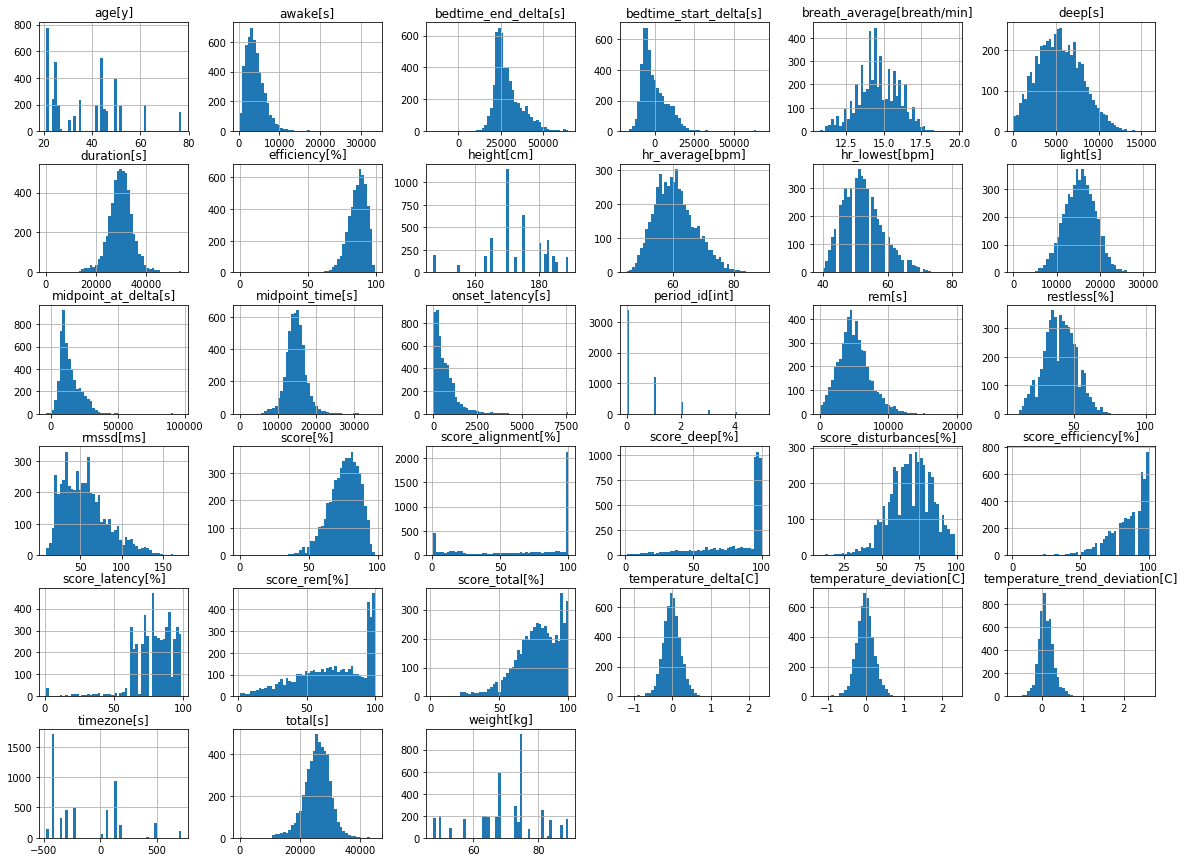

In [33]:
all_columns_with_units =  ['age[y]', 'awake[s]', 'bedtime_end[t]', 'bedtime_end_delta[s]', 'bedtime_start[t]',
                           'bedtime_start_delta[s]', 'breath_average[breath/min]', 'deep[s]', 'duration[s]',
                           'efficiency[%]', 'gender', 'height[cm]', 'hr_5min[bpm]', 'hr_average[bpm]', 'hr_lowest[bpm]',
                           'hypnogram_5min[str]', 'is_longest[bool]', 'light[s]', 'midpoint_at_delta[s]',
                           'midpoint_time[s]', 'onset_latency[s]', 'period_id[int]', 'rem[s]', 'restless[%]',
                           'rmssd[ms]', 'rmssd_5min[bpm]', 'score[%]', 'score_alignment[%]', 'score_deep[%]',
                           'score_disturbances[%]', 'score_efficiency[%]', 'score_latency[%]', 'score_rem[%]',
                           'score_total[%]', 'summary_date[t]', 'temperature_delta[C]',
                           'temperature_deviation[C]', 'temperature_trend_deviation[C]', 'timezone[s]',
                           'total[s]', 'user_id[str]', 'weight[kg]']

num_types = ['age', 'awake', 'bedtime_end_delta','bedtime_start_delta','breath_average','breath_average',
             'deep', 'duration', 'efficiency', 'height', 'hr_average', 'hr_lowest','light', 
             'midpoint_at_delta', 'midpoint_time', 'onset_latency', 'period_id', 'rem', 'restless',
             'rmssd', 'score', 'score_alignment', 'score_deep', 'score_disturbances', 'score_efficiency',
             'score_latency', 'score_rem', 'score_total', 'temperature_delta', 'temperature_deviation',
             'temperature_trend_deviation', 'timezone', 'total', 'weight' ]
time_types = ['bedtime_end', 'bedtime_start', 'summary_date']


df_sleep[num_types] = df_sleep[num_types].apply(pd.to_numeric)
df_sleep[time_types] = df_sleep[time_types].apply(pd.to_datetime)

df_sleep.columns = all_columns_with_units


hist = df_sleep.hist(figsize=(20,15), bins=50)
plt.show()

**Question:** what are the differences between `midpoint_at_delta[s]`, `midpoint_time[s]`, and `onset_latency[s]`?

In [115]:
df_activity.head()

,age,average_met,cal_active,cal_total,class_5min,daily_movement,day_end,day_start,gender,height,...,summary_date,target_calories,target_km,target_miles,timezone,to_target_km,to_target_miles,total,user_id,weight
0,44.0,1.65625,924,3152,1111111111111111111111111111111111222322222222...,15517,2019-02-17T03:59:59+01:00,2019-02-16T04:00:00+01:00,male,184.0,...,2019-02-16,600,12,7.0,60,-5.7,-3.5,346,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
1,44.0,1.62500,841,3104,1111111111111111111111111111111111123211222221...,13922,2019-02-18T03:59:59+01:00,2019-02-17T04:00:00+01:00,male,184.0,...,2019-02-17,600,11,6.5,60,-4.2,-2.6,345,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
2,44.0,1.50000,555,2782,1111111111111111111111123223343322233332223444...,9617,2019-02-19T03:59:59+01:00,2019-02-18T04:00:00+01:00,male,184.0,...,2019-02-18,450,9,5.5,60,-1.8,-1.1,286,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
3,44.0,1.78125,1088,3321,1111111111111112111111111111111232333300000000...,17525,2019-02-20T03:59:59+01:00,2019-02-19T04:00:00+01:00,male,184.0,...,2019-02-19,600,11,7.0,60,-8.7,-5.4,326,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
4,44.0,1.50000,555,2822,1111111111111111111111111111223333322332333444...,9827,2019-02-21T03:59:59+01:00,2019-02-20T04:00:00+01:00,male,184.0,...,2019-02-20,500,9,5.5,60,-0.8,-0.5,320,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3


In [26]:
df_activity.columns

Index(['age', 'average_met', 'cal_active', 'cal_total', 'class_5min',
       'daily_movement', 'day_end', 'day_start', 'gender', 'height', 'high',
       'inactive', 'inactivity_alerts', 'low', 'medium', 'met_1min',
       'met_min_high', 'met_min_inactive', 'met_min_low', 'met_min_medium',
       'non_wear', 'rest', 'score', 'score_meet_daily_targets',
       'score_move_every_hour', 'score_recovery_time', 'score_stay_active',
       'score_training_frequency', 'score_training_volume', 'steps',
       'summary_date', 'target_calories', 'target_km', 'target_miles',
       'timezone', 'to_target_km', 'to_target_miles', 'total', 'user_id',
       'weight'],
      dtype='object')

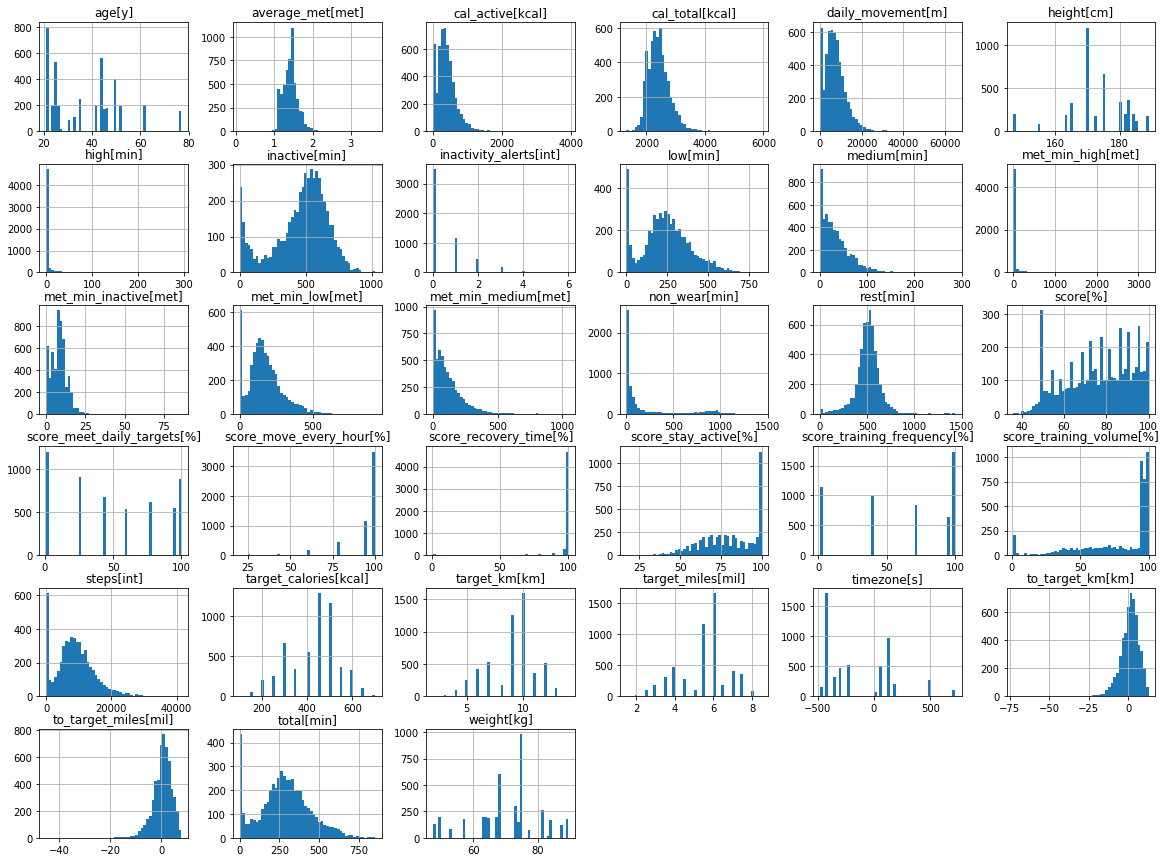

In [34]:
all_columns_with_units =  ['age[y]', 'average_met[met]', 'cal_active[kcal]', 'cal_total[kcal]', 'class_5min[cat]',
                           'daily_movement[m]', 'day_end[t]', 'day_start[t]', 'gender[str]', 'height[cm]', 'high[min]',
                           'inactive[min]', 'inactivity_alerts[int]', 'low[min]', 'medium[min]', 'met_1min[met]',
                           'met_min_high[met]', 'met_min_inactive[met]', 'met_min_low[met]', 'met_min_medium[met]',
                           'non_wear[min]', 'rest[min]', 'score[%]', 'score_meet_daily_targets[%]',
                           'score_move_every_hour[%]', 'score_recovery_time[%]', 'score_stay_active[%]',
                           'score_training_frequency[%]', 'score_training_volume[%]', 'steps[int]',
                           'summary_date[t]', 'target_calories[kcal]', 'target_km[km]', 'target_miles[mil]',
                           'timezone[s]', 'to_target_km[km]', 'to_target_miles[mil]', 'total[min]', 'user_id[str]',
                           'weight[kg]']

num_types = ['age', 'average_met', 'cal_active', 'cal_total', 'daily_movement',
             'height', 'high', 'inactive', 'inactivity_alerts', 'low', 'medium',
             'met_min_high', 'met_min_inactive', 'met_min_low', 'met_min_medium',
             'non_wear', 'rest', 'score', 'score_meet_daily_targets',
             'score_move_every_hour', 'score_recovery_time', 'score_stay_active',
             'score_training_frequency', 'score_training_volume', 'steps',
             'target_calories', 'target_km', 'target_miles', 'timezone', 'to_target_km',
             'to_target_miles', 'total', 'weight']

time_types = ['day_end', 'day_start', 'summary_date']


df_activity[num_types] = df_activity[num_types].apply(pd.to_numeric)
df_activity[time_types] = df_activity[time_types].apply(pd.to_datetime) 

df_activity.columns = all_columns_with_units


hist = df_activity.hist(figsize=(20,15), bins=50)
plt.show()

In [116]:
df_readiness.head()

,age,gender,height,period_id,score,score_activity_balance,score_previous_day,score_previous_night,score_recovery_index,score_resting_hr,score_sleep_balance,score_temperature,summary_date,user_id,weight
0,44.0,male,184.0,1,86,76,75,89,100,97,100,76,2019-02-16,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
1,44.0,male,184.0,0,75,71,63,72,56,70,99,100,2019-02-17,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
2,44.0,male,184.0,1,87,72,75,100,37,98,99,95,2019-02-18,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
3,44.0,male,184.0,0,81,65,53,89,62,85,96,100,2019-02-19,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3
4,44.0,male,184.0,0,92,67,85,100,83,100,96,100,2019-02-20,EKMAYS6DRKEXV3YMDKNUOSFTFXEEVBY5,89.3


In [31]:
df_readiness.columns

Index(['age', 'gender', 'height', 'period_id', 'score',
       'score_activity_balance', 'score_previous_day', 'score_previous_night',
       'score_recovery_index', 'score_resting_hr', 'score_sleep_balance',
       'score_temperature', 'summary_date', 'user_id', 'weight'],
      dtype='object')

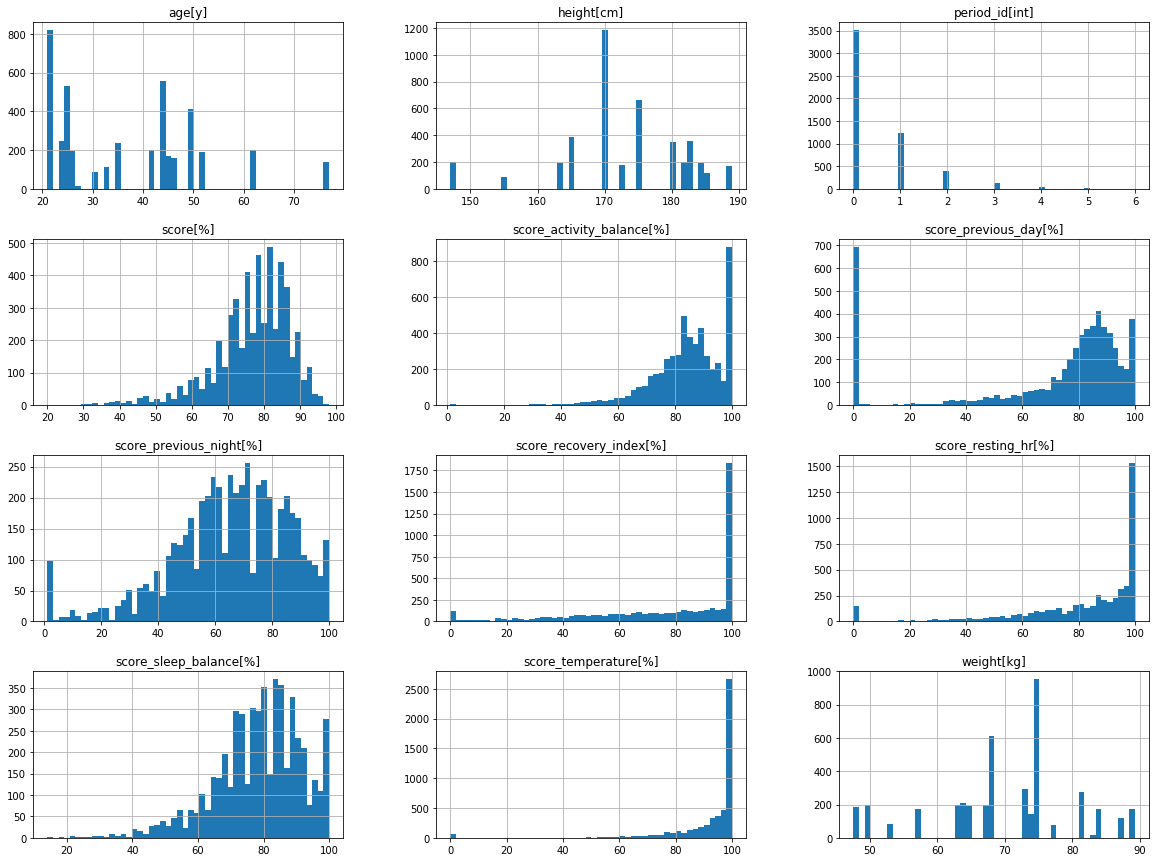

In [35]:
all_columns_with_units =  ['age[y]', 'gender[str]', 'height[cm]', 'period_id[int]', 'score[%]',
                           'score_activity_balance[%]', 'score_previous_day[%]', 'score_previous_night[%]',
                           'score_recovery_index[%]', 'score_resting_hr[%]', 'score_sleep_balance[%]',
                           'score_temperature[%]', 'summary_date[t]', 'user_id[str]', 'weight[kg]']

num_types = ['age', 'height', 'period_id', 'score', 'score_activity_balance',
             'score_previous_day', 'score_previous_night', 'score_recovery_index', 
             'score_resting_hr', 'score_sleep_balance', 'score_temperature', 'weight']

time_types = ['summary_date']


df_readiness[num_types] = df_readiness[num_types].apply(pd.to_numeric)
df_readiness[time_types] = df_readiness[time_types].apply(pd.to_datetime) 

df_readiness.columns = all_columns_with_units


hist = df_readiness.hist(figsize=(20,15), bins=50)
plt.show()

Now, let's check the frequency of records per sumary day

In [54]:
d.

count                    5357
unique                    201
top       2019-08-23 00:00:00
freq                       34
first     2019-02-16 00:00:00
last      2019-09-04 00:00:00
Name: summary_date[t], dtype: object

In [57]:
print('Total Number of features:', len(df_sleep.columns) + len(df_activity.columns) + len(df_readiness.columns) - 10)

Total Number of features: 87
